## Para o Projeto 2 o objetivo é responder10 perguntas de negócio a partir de um dataset sobre uma rede de varejo que comercializa diversos produtos em diversas cidades dos EUA.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('C:\Data_Sience\Projeto_DSA\dataset.csv')

In [3]:
dados.info()
dados.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Pedido     9700 non-null   object 
 1   Data_Pedido   9700 non-null   object 
 2   ID_Cliente    9700 non-null   object 
 3   Segmento      9700 non-null   object 
 4   Pais          9700 non-null   object 
 5   Cidade        9700 non-null   object 
 6   Estado        9700 non-null   object 
 7   ID_Produto    9700 non-null   object 
 8   Categoria     9700 non-null   object 
 9   SubCategoria  9700 non-null   object 
 10  Valor_Venda   9700 non-null   float64
dtypes: float64(1), object(10)
memory usage: 833.7+ KB


(9700, 11)

In [4]:
dados.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [5]:
dados_de_of = dados[['Categoria', 'Cidade', 'Valor_Venda']].loc[dados.Categoria == 'Office Supplies'].groupby('Cidade').sum().sort_values(by='Valor_Venda', ascending=False)

In [6]:
dados_de_of.head()


,Valor_Venda
Cidade,
New York City,68362.814
Los Angeles,47098.100
San Francisco,41771.198
Seattle,34856.878
Philadelphia,29313.687


A CIDADE com maior valor de vendas na CATEGORIA 'Office Supplies' foi: NOVA IORK

## Qual o Total de Vendas Por Data do Pedido?Demonstre o resultado através de um gráfico de barras.

1. Resposta sem levar em conta como série temporal

In [7]:
dados_pordata_desordem = dados[['Data_Pedido', 'Valor_Venda']].groupby('Data_Pedido').sum()


In [8]:
dados_pordata_desordem.head()

,Valor_Venda
Data_Pedido,
01/01/2018,1481.8280
01/02/2015,468.9000
01/02/2017,161.9700
01/03/2015,2203.1510
01/03/2016,1642.1744


<Figure size 640x480 with 0 Axes>

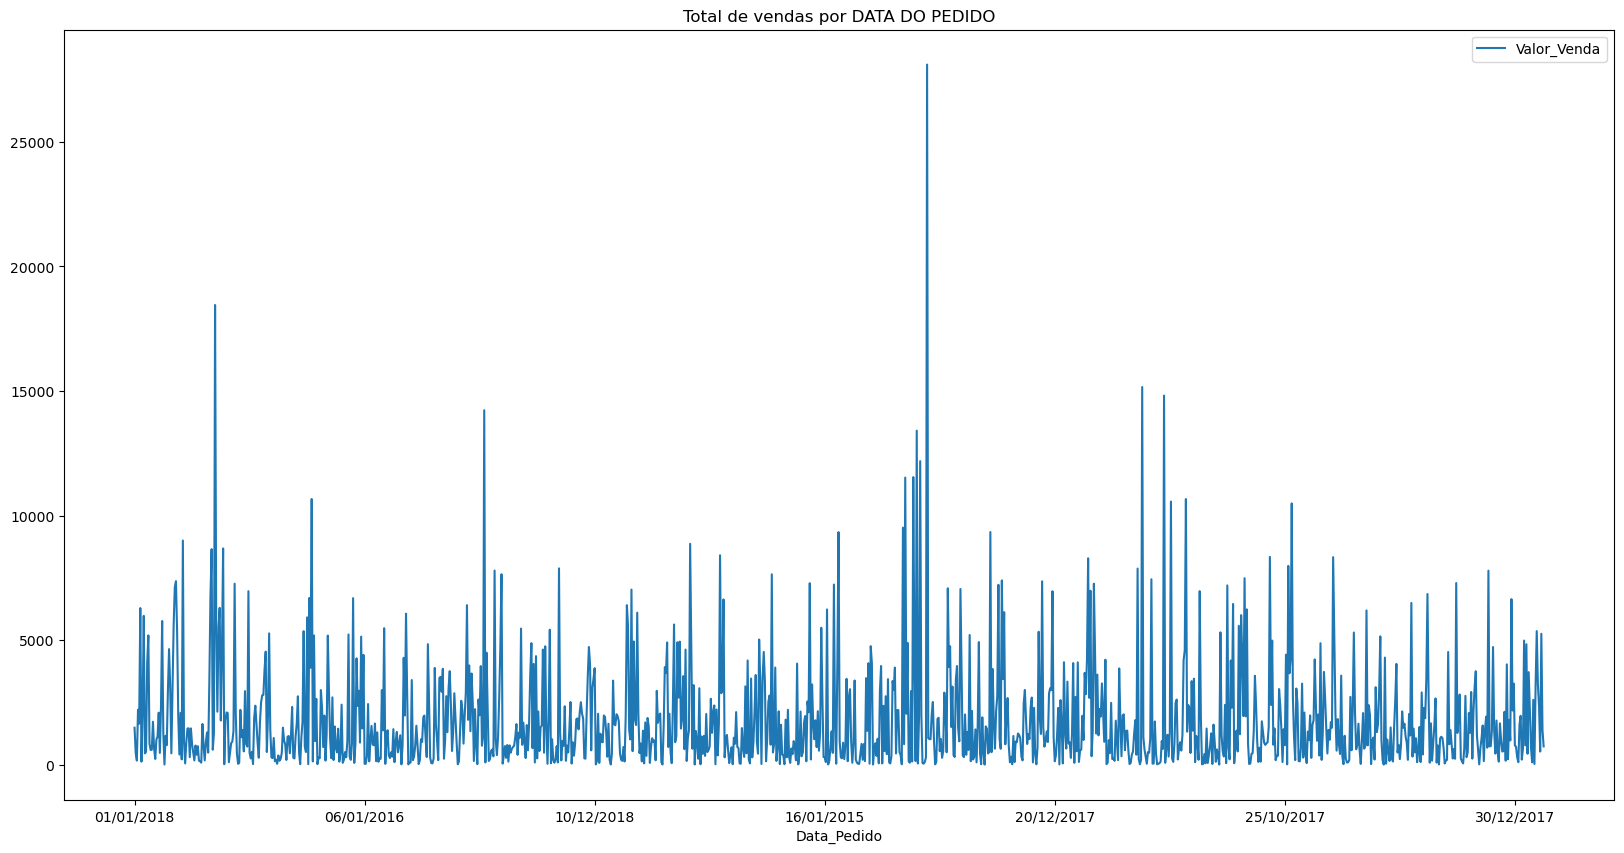

In [9]:
plt.figure()
dados_pordata_desordem.plot(figsize=(20, 10))
plt.title('Total de vendas por DATA DO PEDIDO')
plt.show()

2. Resposta como série temporal

In [10]:
dados_por_data = dados[['Data_Pedido', 'Valor_Venda']]
dados_por_data.head()

,Data_Pedido,Valor_Venda
0,08/11/2017,261.9600
1,08/11/2017,731.9400
2,12/06/2017,14.6200
3,11/10/2016,957.5775
4,11/10/2016,22.3680


In [11]:
dados_por_data['Data_Pedido'] = pd.to_datetime(dados_por_data['Data_Pedido'], format='%d/%m/%Y')

C:\Users\affon\AppData\Local\Temp\ipykernel_7024\3521752936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_por_data['Data_Pedido'] = pd.to_datetime(dados_por_data['Data_Pedido'], format='%d/%m/%Y')


In [12]:
dados_por_data.groupby('Data_Pedido').sum()

,Valor_Venda
Data_Pedido,
2015-01-03,16.4480
2015-01-04,288.0600
2015-01-05,19.5360
2015-01-06,4407.1000
2015-01-07,87.1580
...,...
2018-12-26,814.5940
2018-12-27,177.6360
2018-12-28,1657.3508


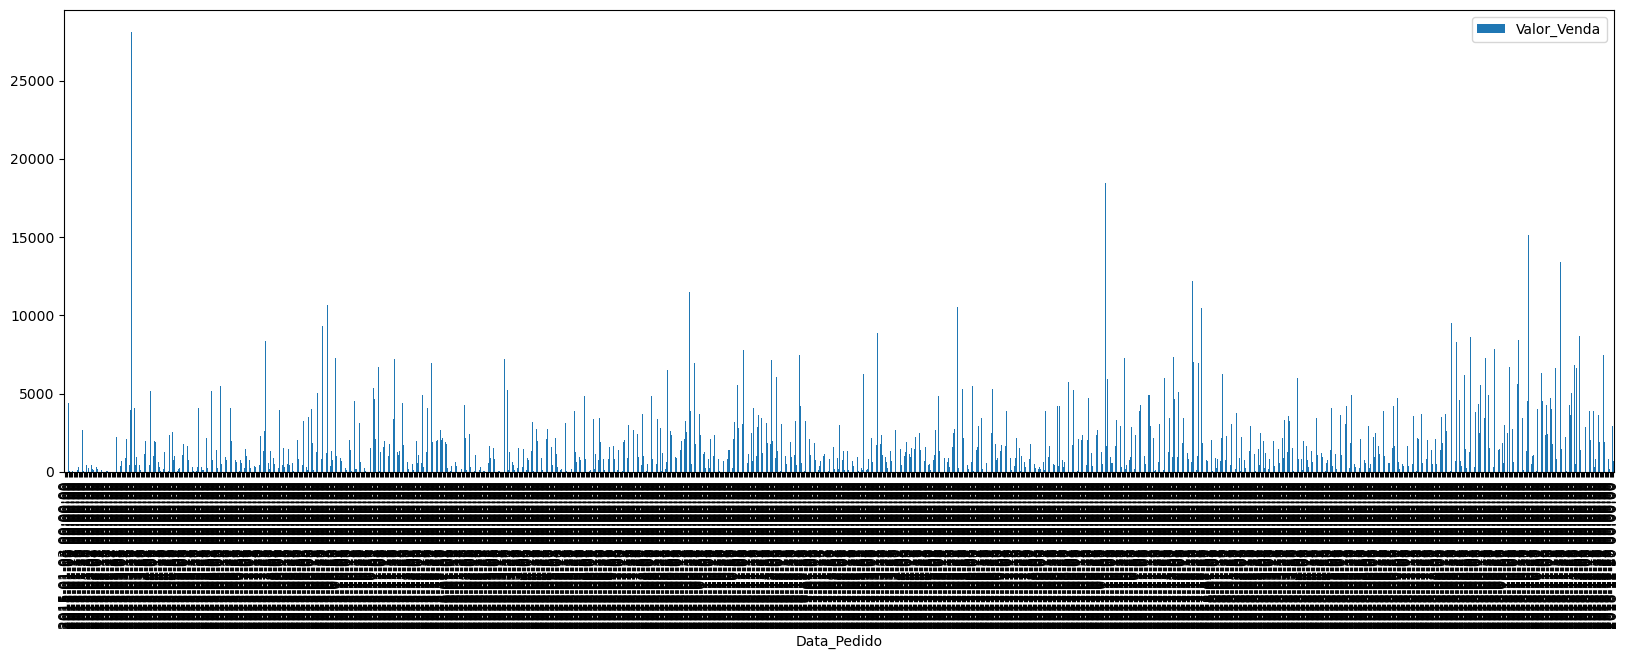

In [13]:
dados_por_data.groupby('Data_Pedido').sum().plot.bar(figsize=(20, 6));

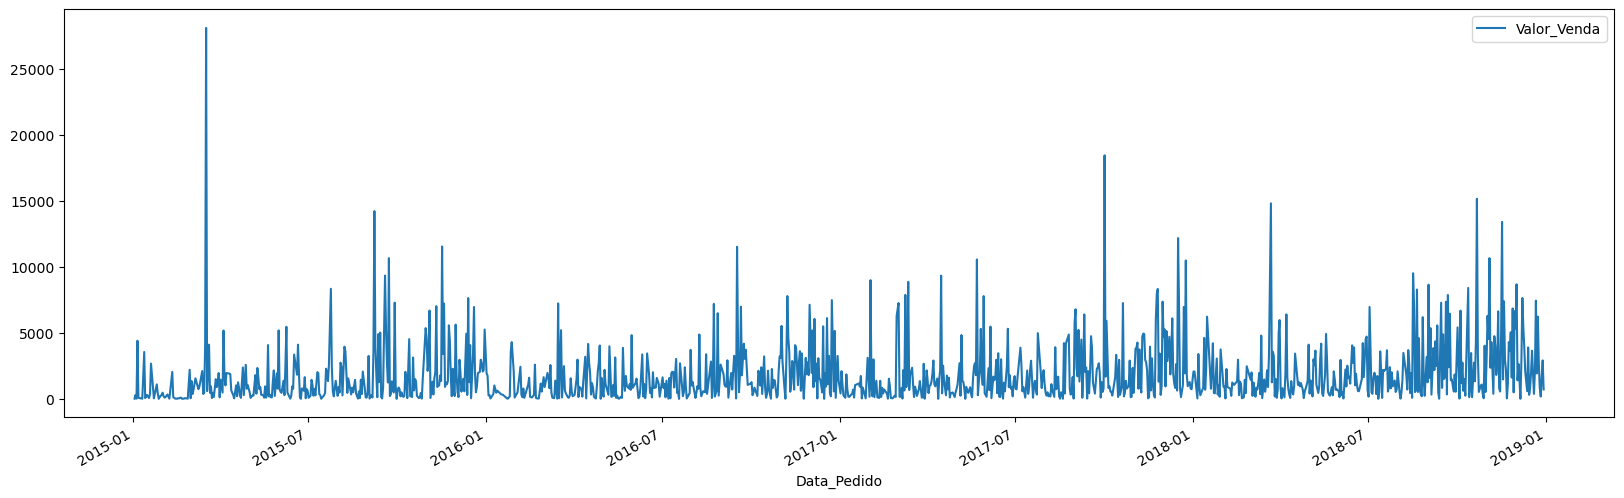

In [14]:
dados_por_data.groupby('Data_Pedido').sum().plot(figsize=(20, 6));

## Qual o Total de Vendas por Estado?Demonstre o resultado através de um gráfico de barras.

In [15]:
dados_por_estado = dados[['Estado', 'Valor_Venda']].groupby('Estado').sum().sort_values(by='Valor_Venda', ascending=False)
dados_por_estado.head()

,Valor_Venda
Estado,
California,442927.0975
New York,304536.4010
Texas,163549.8602
Washington,133826.0060
Pennsylvania,114411.6800


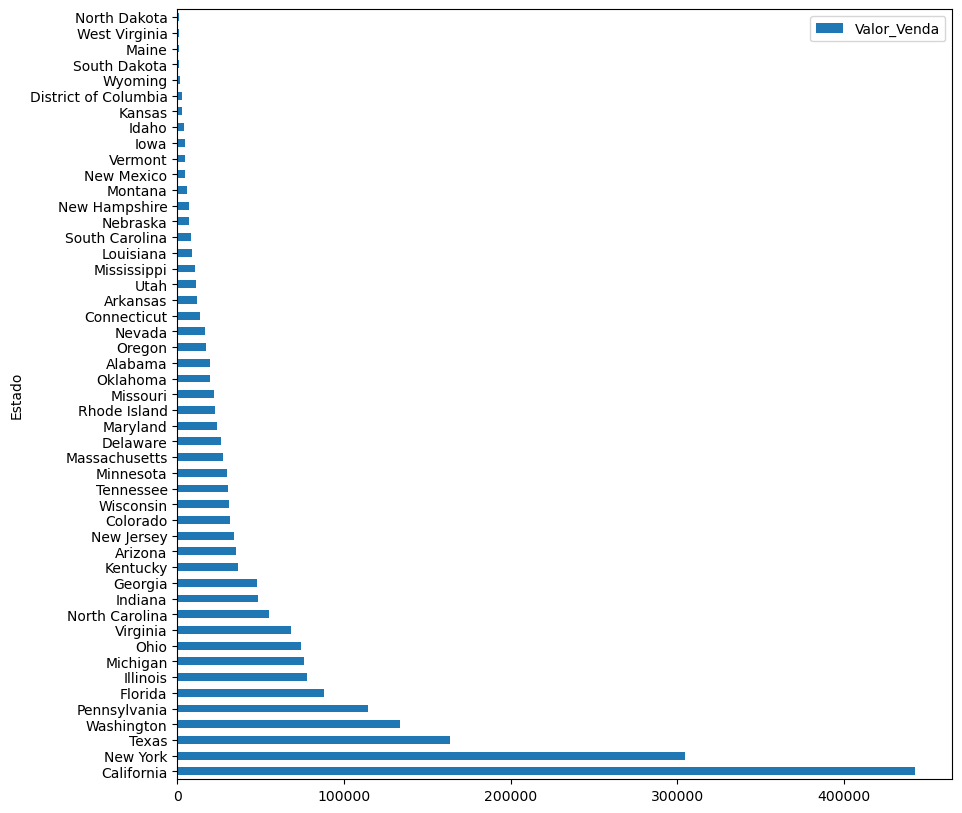

In [16]:
dados_por_estado.plot.barh(figsize=(10,10));

Usando o SEABORN a baixo:

In [17]:
import seaborn as sns

In [18]:
dados_por_estado2 = dados[['Estado', 'Valor_Venda']].groupby('Estado').sum().reset_index()
dados_por_estado2.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


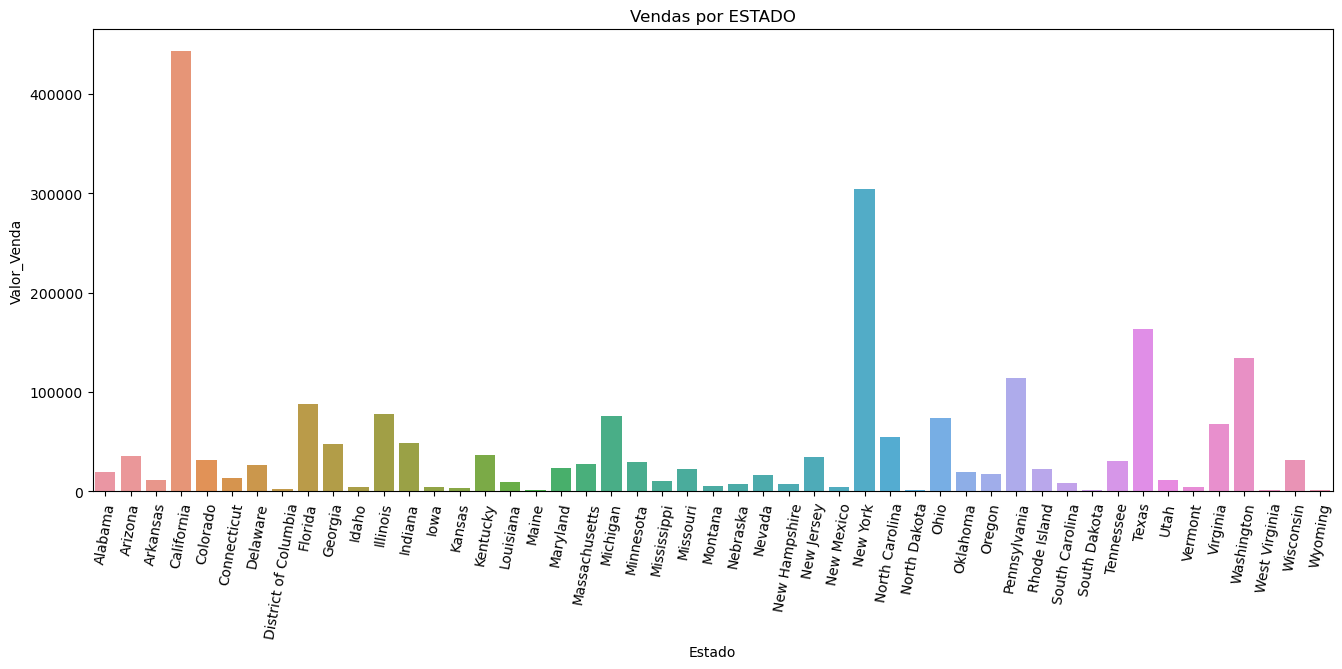

In [19]:
plt.figure(figsize=(16, 6))
sns.barplot(data = dados_por_estado2, y = 'Valor_Venda', x = 'Estado').set(title = 'Vendas por ESTADO')
plt.xticks(rotation = 80)
plt.show()

## Quais São as 10 Cidades com Maior Total de Vendas?Demonstre o resultado através de um gráfico de barras.

In [20]:
dados_por_cidade = dados[['Cidade', 'Valor_Venda']].groupby('Cidade').sum().sort_values(by='Valor_Venda', ascending=True).tail(10)
dados_por_cidade

,Valor_Venda
Cidade,
Detroit,42446.9440
Jacksonville,44713.1830
Chicago,46974.3430
San Diego,47458.3790
Houston,61590.1868
Philadelphia,107197.8030
San Francisco,107489.9520
Seattle,114725.4780
Los Angeles,171654.6330


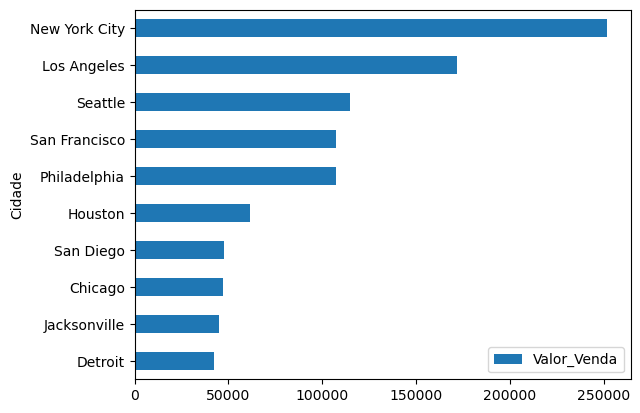

In [21]:
dados_por_cidade.plot.barh();

## Qual Segmento Teve o Maior Total de Vendas?Demonstre o resultado através de um gráfico de pizza.

In [22]:
dados_por_segmento = dados[['Segmento', 'Valor_Venda']].groupby('Segmento').sum().sort_values(by='Valor_Venda', ascending=False)
dados_por_segmento.head()

,Valor_Venda
Segmento,
Consumer,1.133834e+06
Corporate,6.792322e+05
Home Office,4.224914e+05


Uso o comando abaixo para formatar a formatação cientifica 

In [23]:
pd.set_option('float_format', '{:.3f}'.format)

In [24]:
dados_por_segmento = dados_por_segmento.reset_index()
dados_por_segmento

,Segmento,Valor_Venda
0,Consumer,1133834.335
1,Corporate,679232.187
2,Home Office,422491.433


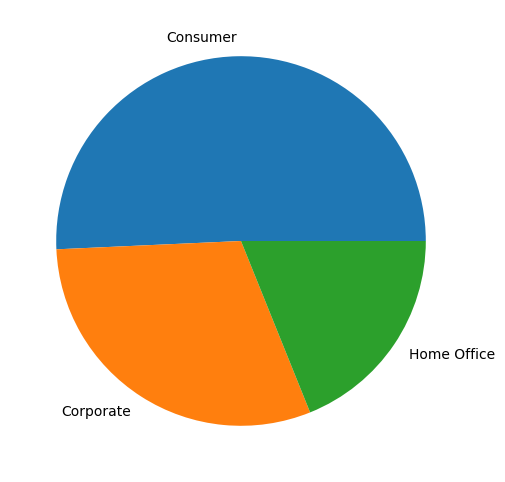

In [25]:
plt.figure(figsize=(16, 6))

plt.pie(dados_por_segmento['Valor_Venda'], labels = dados_por_segmento['Segmento'], )
plt.show()

## Qual o Total de Vendas Por Segmento e Por Ano?

In [26]:
dados_seg_ano = dados[['Segmento', 'Data_Pedido', 'Valor_Venda']]
dados_seg_ano.head()


,Segmento,Data_Pedido,Valor_Venda
0,Consumer,08/11/2017,261.960
1,Consumer,08/11/2017,731.940
2,Corporate,12/06/2017,14.620
3,Consumer,11/10/2016,957.577
4,Consumer,11/10/2016,22.368


In [27]:
dados_seg_ano['Data_Pedido'] = pd.to_datetime(dados_seg_ano['Data_Pedido'], format='%d/%m/%Y')

C:\Users\affon\AppData\Local\Temp\ipykernel_7024\214600056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_seg_ano['Data_Pedido'] = pd.to_datetime(dados_seg_ano['Data_Pedido'], format='%d/%m/%Y')


In [28]:
dados_seg_ano['Data_Ano'] = dados_seg_ano['Data_Pedido'].dt.year

C:\Users\affon\AppData\Local\Temp\ipykernel_7024\3828147403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_seg_ano['Data_Ano'] = dados_seg_ano['Data_Pedido'].dt.year


In [29]:
del dados_seg_ano['Data_Pedido']
dados_seg_ano.head()

,Segmento,Valor_Venda,Data_Ano
0,Consumer,261.960,2017
1,Consumer,731.940,2017
2,Corporate,14.620,2017
3,Consumer,957.577,2016
4,Consumer,22.368,2016


In [30]:
dados_seg_ano.groupby(['Segmento', 'Data_Ano']).sum()

Valor_Venda
Segmento    Data_Ano             
Consumer    2015       256719.917
            2016       265295.259
            2017       288459.557
            2018       323359.602
Corporate   2015       125819.596
            2016       114643.123
            2017       203266.740
            2018       235502.728
Home Office 2015        88229.088
            2016        74134.133
            2017       103639.627
            2018       156488.585

## Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:

Se o Valor_Venda for maior que 1000 recebe 15% de desconto.Se o Valor_Venda for menor que 1000 recebe 10% de desconto.Quantas Vendas Receberiam 15% de Desconto?

In [31]:
dados_desc = dados[dados.Valor_Venda > 1000]
dados_desc.shape

(457, 11)

RESPOSTA: 457 vendas acima de R$1000

## Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [32]:
vendas_sem_desc = dados['Valor_Venda'].loc[dados.Valor_Venda > 1000]
print(f'A média do valor de vendas ANTES DO DESCONTO: {vendas_sem_desc.mean():.2f}') 

A média do valor de vendas ANTES DO DESCONTO: 2116.81


In [33]:
vendas_com_desc = vendas_sem_desc - (vendas_sem_desc * 0.15)
print(f'A média do valor de vendas DEPOIS DO DESCONTO: {vendas_com_desc.mean():.2f}') 

A média do valor de vendas DEPOIS DO DESCONTO: 1799.29


In [34]:
df_diferença_desc = pd.DataFrame({'Vendas_SEM_desconto': vendas_sem_desc, 'Vendas_COM_desconto': vendas_com_desc})

In [35]:
df_diferença_desc

,Vendas_SEM_desconto,Vendas_COM_desconto
10,1706.184,1450.256
24,1044.630,887.936
27,3083.430,2620.916
35,1097.544,932.912
54,1029.950,875.457
...,...,...
9632,1628.820,1384.497
9636,4297.644,3652.997
9646,3406.664,2895.664
9657,3023.928,2570.339


In [36]:
df_diferença_desc.mean()

Vendas_SEM_desconto   2116.808
Vendas_COM_desconto   1799.287
dtype: float64

## Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?Demonstre o resultado através de gráfico de linha.

In [37]:
dados2 = dados[['Segmento', 'Data_Pedido', 'Valor_Venda']]

In [38]:
dados2['Data_Pedido'] = pd.to_datetime(dados2['Data_Pedido'], format='%d/%m/%Y')

C:\Users\affon\AppData\Local\Temp\ipykernel_7024\2404224219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados2['Data_Pedido'] = pd.to_datetime(dados2['Data_Pedido'], format='%d/%m/%Y')


In [39]:
dados2['Data_ano'], dados2['Data_mes'] = dados2['Data_Pedido'].dt.year, dados2['Data_Pedido'].dt.month

C:\Users\affon\AppData\Local\Temp\ipykernel_7024\257221950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados2['Data_ano'], dados2['Data_mes'] = dados2['Data_Pedido'].dt.year, dados2['Data_Pedido'].dt.month
C:\Users\affon\AppData\Local\Temp\ipykernel_7024\257221950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados2['Data_ano'], dados2['Data_mes'] = dados2['Data_Pedido'].dt.year, dados2['Data_Pedido'].dt.month


In [40]:
dados2.head()

,Segmento,Data_Pedido,Valor_Venda,Data_ano,Data_mes
0,Consumer,2017-11-08,261.960,2017,11
1,Consumer,2017-11-08,731.940,2017,11
2,Corporate,2017-06-12,14.620,2017,6
3,Consumer,2016-10-11,957.577,2016,10
4,Consumer,2016-10-11,22.368,2016,10


In [41]:
dados3 = dados2[['Data_ano', 'Data_mes', 'Segmento', 'Valor_Venda']].groupby(['Data_ano', 'Data_mes', 'Segmento']).mean()
dados3

Valor_Venda
Data_ano Data_mes Segmento                
2015     1        Consumer         146.737
                  Corporate        130.887
                  Home Office      329.856
         2        Consumer         117.328
                  Corporate         69.235
...                                    ...
2018     11       Corporate        341.215
                  Home Office      247.519
         12       Consumer         183.616
                  Corporate        153.167
                  Home Office      224.524

[144 rows x 1 columns]

In [42]:
# Para extrair os INDICES
anos = dados3.index.get_level_values(0)
meses = dados3.index.get_level_values(1)
segmento = dados3.index.get_level_values(2)

<Figure size 1200x1200 with 0 Axes>

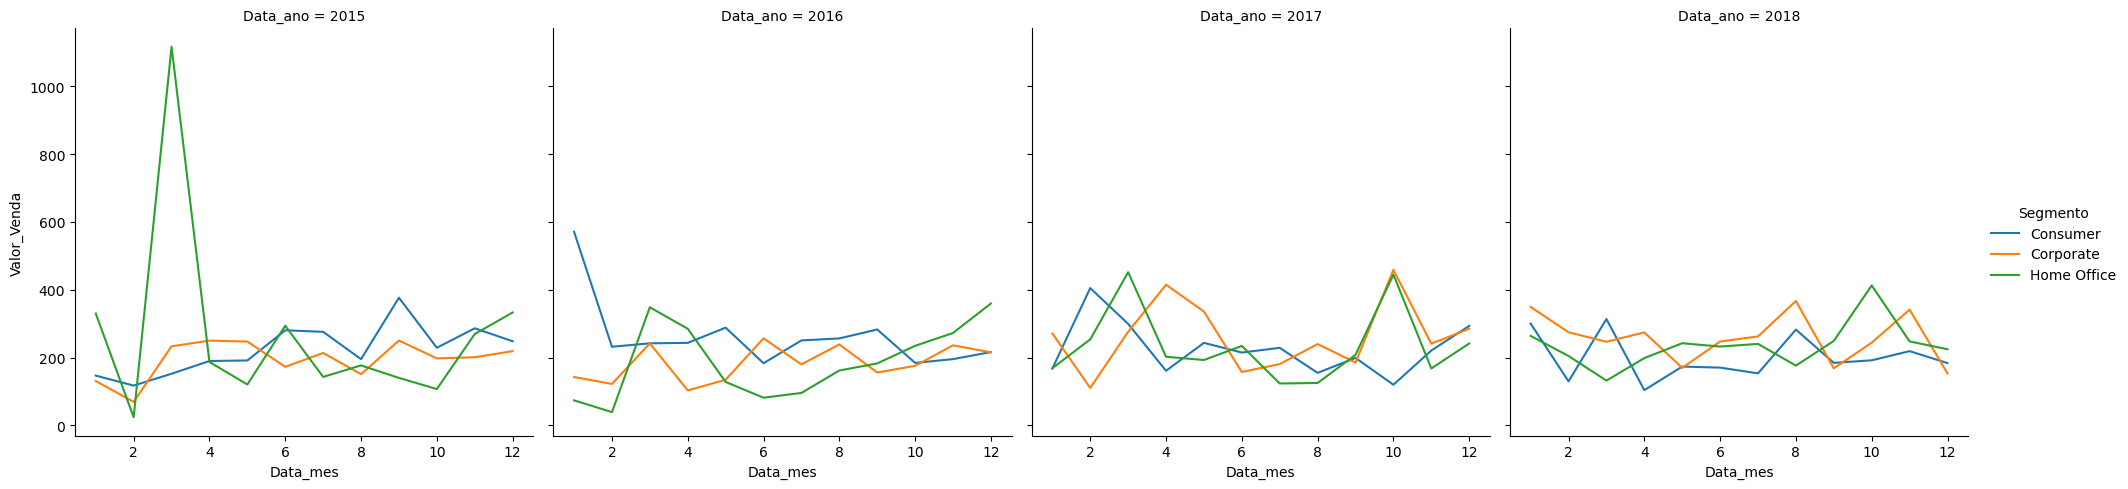

In [43]:
# plotar

plt.figure(figsize=(12, 12))

fig1 = sns.relplot(kind = 'line', data = dados3, y = 'Valor_Venda', x = meses, hue = segmento, col= anos, col_wrap = 4)
plt.show()


Nos gráficos a cima foi usado o seaborn.relplot para confecção. 

## Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?Demonstre tudo através de um único gráfico.

In [44]:
dados_subcategorias = dados[['SubCategoria', 'Categoria', 'Valor_Venda']].groupby(['Categoria', 'SubCategoria']).sum().sort_values(by='Valor_Venda', ascending=False).head(12)
dados_subcategorias

Valor_Venda
Categoria       SubCategoria             
Technology      Phones         325271.294
Furniture       Chairs         317919.625
Office Supplies Storage        216188.362
Furniture       Tables         202083.360
Office Supplies Binders        194723.381
Technology      Machines       189238.631
                Accessories    162791.362
                Copiers        146248.094
Furniture       Bookcases      108045.047
Office Supplies Appliances     104061.693
Furniture       Furnishings     88862.770
Office Supplies Paper           76312.764

In [45]:
dados_subcategorias = dados_subcategorias.sort_values(by='Categoria').reset_index()
dados_subcategorias

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919.625
1,Furniture,Tables,202083.360
2,Furniture,Bookcases,108045.047
3,Furniture,Furnishings,88862.770
4,Office Supplies,Storage,216188.362
5,Office Supplies,Binders,194723.381
6,Office Supplies,Appliances,104061.693
7,Office Supplies,Paper,76312.764
8,Technology,Phones,325271.294
9,Technology,Machines,189238.631


In [46]:
df_dados_cat = dados_subcategorias.groupby('Categoria').sum(numeric_only = True).reset_index()
df_dados_cat

,Categoria,Valor_Venda
0,Furniture,716910.802
1,Office Supplies,591286.200
2,Technology,823549.381


In [47]:
# Listas de cores para CATEGORIA:
cores_categoria = ['#5d00de', '#0ee84f', '#e80e27']

In [48]:
# Lista de Cores para SUBCATEGORIA:
cores_subcategoria = [
    '#aa8cd4',
    '#aa8cd5',
    '#aa8cd6',
    '#aa8cd7',
    '#26c957',
    '#26c958',
    '#26c959',
    '#26c960',
    '#e65e65',
    '#e65e66',
    '#e65e67',
    '#e65e68'
]

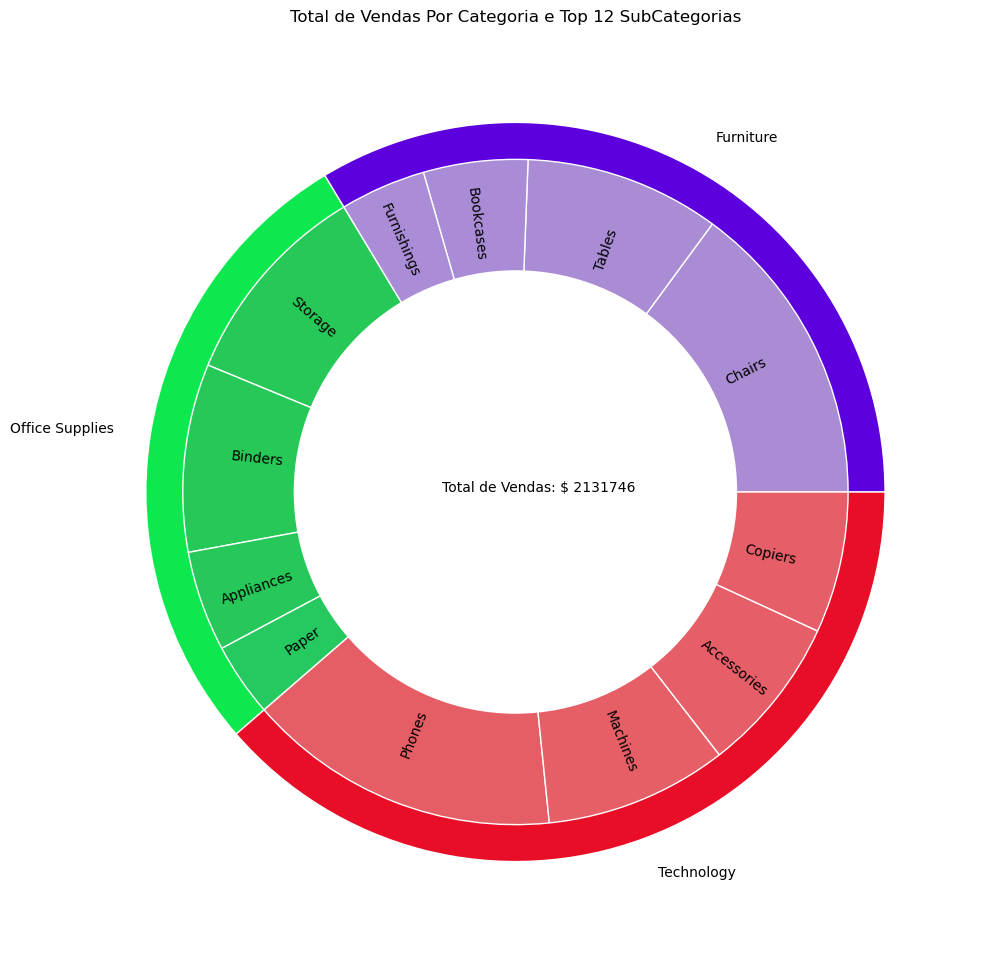

In [49]:
# Plot

# Tamanho da Figura
fig, ax = plt.subplots(figsize=(18, 12))

# Gráfico das CATEGORIAS:
p1 = ax.pie(
    df_dados_cat['Valor_Venda'],
    radius = 1,
    labels = df_dados_cat['Categoria'],
    wedgeprops = dict(edgecolor = 'white'),
    colors = cores_categoria)

# Gráfico das SUBCATEGORIAS:
p2 = ax.pie(dados_subcategorias['Valor_Venda'],
           radius = 0.9,
           labels = dados_subcategorias['SubCategoria'],
           colors = cores_subcategoria,
           
           labeldistance = 0.7,
           wedgeprops = dict(edgecolor = 'white'),
           pctdistance = 0.53,
           rotatelabels = True)

# Limpa o centro do cículo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(dados_subcategorias['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()